In [1]:
#libraries to use for this exercise (please fun this cell first):
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
import scipy.io
import matplotlib.cm as cm

In [2]:
#Load the .mat data using scipy.io, which will be a dictionary datatype.
data_dict = scipy.io.loadmat('ex5/ex5data1.mat')
X=data_dict['X']
y=data_dict['y']
X=np.matrix(X)
y=np.matrix(y)
Xval=data_dict['Xval']
yval=data_dict['yval']
Xval=np.matrix(Xval)
yval=np.matrix(yval)
Xtest=data_dict['Xtest']
ytest=data_dict['ytest']
Xtest=np.matrix(Xtest)
ytest=np.matrix(ytest)

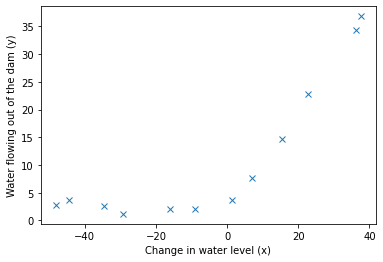

In [3]:
#Visualize the data using Matplotlib and decide if a linear regression woule be appropriate.
plt.plot(X, y, 'x')
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.show()

In [4]:
#define a regularised linear regression function
#Theta is a row matrix
def linearRegCostFunction(theta, X, y, lambd):
    m=np.shape(X)[0]
    grad = np.matrix(np.zeros((np.shape(theta))))
    theta = np.matrix(theta)
    J0=X*theta.T
    J0=J0-y
    J1=sum(np.multiply((J0),(J0)))
    J2=lambd*sum(np.multiply((theta[0,1:]),(theta[0,1:])))
    J=(J1+J2)/(2*m)
    return np.array(J)[0][0]

In [5]:
def Gradient(theta, X, y, lambd):
    m=np.shape(X)[0]
    grad = np.matrix(np.zeros((np.shape(theta))))
    theta = np.matrix(theta)
    grad[0,0] =(1/m)*np.sum((X*theta.T-y).T*X[:,0])
    grad[0,1:]=(1/m)*(X*theta.T-y).T*X[:,1:]+(lambd/m)*theta[:, 1:]
    return grad

In [6]:
#test
theta = [1, 1]
m = np.shape(X)[0]
additional_coulmn = np.ones((m,1))
X = np.append(additional_coulmn,X,axis=1)
lambd = 0

In [7]:
linearRegCostFunction(theta, X, y, lambd)

303.9515255535976

In [8]:
#didn't figure out why this chunk does not produce the correct result. Please do not run this cell.
#m = np.shape(X)[0]
#grad = np.zeros((np.shape(theta)))
#theta = np.matrix(theta)
#J=(sum(np.multiply((X*theta.T-y),(X*theta.T-y)))+lambd*sum(np.multiply((theta[0,1:]),(theta[0,1:]))))/(2*m)
#J0=X*(theta.T)
#J0=J0-y
#J0

In [9]:
#define a function to find the optimal theta and the corresponding cost
def trainLinearReg(X, y, lambd):
    [m,n]=np.shape(X)
    initial_theta = np.zeros((n), dtype=int)
    result = opt.minimize(fun=linearRegCostFunction, x0=np.array(initial_theta), args=(X, y, lambd), method="TNC", jac=Gradient)
    return result

In [10]:
thetaoptimal = trainLinearReg(X, y, 0)

In [11]:
thetaoptimal

     fun: 22.373906495108912
     jac: matrix([[2.86637306e-09, 3.60160612e-08]])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 9
     nit: 4
  status: 0
 success: True
       x: array([13.08790351,  0.36777923])

In [12]:
result = linearRegCostFunction(thetaoptimal.x, X, y, 0)
result

22.373906495108912

In [13]:
# Learning cuves
#Note: X is with a bias term in the input. All matrix
def learningCurve(X, y, Xval, yval, lambd):
    [m,n] = np.shape(X)
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))
    b=np.shape(yval)[0]
    for i in range (1,m+1):
        Xtrain = X[0:i, :]
        ytrain = y[0:i, :]
        t = trainLinearReg(Xtrain, ytrain, lambd).x
        t = np.matrix(t)
        J=sum(np.multiply((Xtrain*t.T-ytrain),(Xtrain*t.T-ytrain)))/(2*i)
        error_train[i-1] = J
        J=sum(np.multiply((Xval*t.T-yval),(Xval*t.T-yval)))/(2*b)
        error_val[i-1] = J
    return error_train[1:,:], error_val[1:,:]

In [14]:
lambd = 0
[m_val,n_val] = np.shape(Xval)
additional_coulmnval = np.ones((m_val,1))
Xval = np.append(additional_coulmnval,Xval,axis=1)
[error_train, error_val] = learningCurve(X, y, Xval, yval, lambd)

In [15]:
error_train

array([[3.46657146e-09],
       [3.28659505e+00],
       [2.84267769e+00],
       [1.31540488e+01],
       [1.94439625e+01],
       [2.00985217e+01],
       [1.81728587e+01],
       [2.26094054e+01],
       [2.32614616e+01],
       [2.43172496e+01],
       [2.23739065e+01]])

In [16]:
error_val

array([[110.30264058],
       [ 45.01023136],
       [ 48.36891083],
       [ 35.86516473],
       [ 33.82996133],
       [ 31.97098584],
       [ 30.8624463 ],
       [ 31.13599798],
       [ 28.93620747],
       [ 29.55143162],
       [ 29.43381813]])

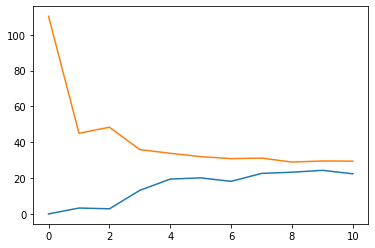

In [17]:
plt.plot(error_train) 
plt.plot(error_val)
plt.show()

In [18]:
#define a poly feature function
def polyFeatures(X, p):
    X_poly = np.matrix(np.zeros((np.shape(X)[0], p)))
    for i in range (1, p+1):
        X_poly[:,i-1]=np.power(X,i)
    return X_poly

In [19]:
#define a feature normalisation function
#Note: the sigma calculation is different to Matlab because this np.std is using /n while Matlab is using /(n-1)
#So the result is slightly different
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm/sigma
    return X_norm, mu, sigma

In [20]:
#Load the .mat data using scipy.io, which will be a dictionary datatype.
data_dict = scipy.io.loadmat('ex5/ex5data1.mat')
X=data_dict['X']
y=data_dict['y']
X=np.matrix(X)
y=np.matrix(y)
Xval=data_dict['Xval']
yval=data_dict['yval']
Xval=np.matrix(Xval)
yval=np.matrix(yval)
Xtest=data_dict['Xtest']
ytest=data_dict['ytest']
Xtest=np.matrix(Xtest)
ytest=np.matrix(ytest)

#set up the new poly_x matrix with a degree of 8 and use feature normalisation and calculate the optimal theta
p = 8
#Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly)
m = np.shape(X_poly)[0]
additional_coulmnforX_poly = np.ones((m,1))
X_poly = np.append(additional_coulmnforX_poly,X_poly,axis=1)
X_poly = np.matrix(X_poly)

In [21]:
X_poly_test = polyFeatures(Xtest, p);
[X_poly_test, mu_test, sigma_test] = featureNormalize(X_poly_test) 
m = np.shape(X_poly_test)[0]
additional_coulmnforX_poly_test = np.ones((m,1))
X_poly_test = np.append(additional_coulmnforX_poly_test,X_poly_test,axis=1)

In [22]:
X_poly_val = polyFeatures(Xval, p);
[X_poly_val, mu_val, sigma_val] = featureNormalize(X_poly_val) 
m = np.shape(X_poly_val)[0]
additional_coulmnforX_poly_val = np.ones((m,1))
X_poly_val = np.append(additional_coulmnforX_poly_val,X_poly_val,axis=1)

In [23]:
lambd = 0
trainLinearReg(X_poly, y, lambd)

     fun: 0.039197213538362266
     jac: matrix([[ 0.00296534, -0.00947072,  0.00084651,  0.00336073, -0.00330154,
          0.002008  , -0.00189226, -0.00018057, -0.00047766]])
 message: 'Max. number of function evaluations reached'
    nfev: 100
     nit: 22
  status: 3
 success: False
       x: array([ 11.22055467,   9.23855578,  19.84166063,  24.53522072,
       -35.47618272, -58.43326547,  24.85347336,  45.60494138,
         5.82947323])

In [24]:
lambd = 0

[error_train, error_val] = learningCurve(X_poly, y, X_poly_val, yval, lambd)

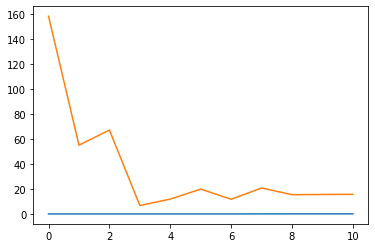

In [25]:
plt.plot(error_train) 
plt.plot(error_val)
plt.show()

In [26]:
lambd = 1

[error_train, error_val] = learningCurve(X_poly, y, X_poly_val, yval, lambd)

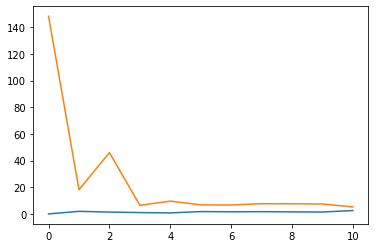

In [27]:
plt.plot(error_train) 
plt.plot(error_val)
plt.show()

In [28]:
lambd = 100

[error_train, error_val] = learningCurve(X_poly, y, X_poly_val, yval, lambd)

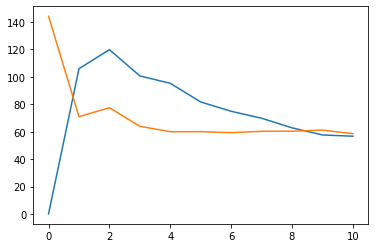

In [29]:
plt.plot(error_train) 
plt.plot(error_val)
plt.show()

In [30]:
def validationCurve(X, y, Xval, yval):
    lambda_vec = [0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10]
    error_train = np.zeros((np.shape(lambda_vec)[0], 1))
    error_val = np.zeros((np.shape(lambda_vec)[0], 1))
    m = np.shape(X)[0]
    b = np.shape(yval)[0]
    for i in range(1, np.shape(lambda_vec)[0]+1):
        t=trainLinearReg(X, y, lambda_vec[i-1]).x
        t = np.matrix(t)
        J=np.sum(np.multiply((X*t.T-y),(X*t.T-y)))/(2*m)
        error_train[i-1] = J
        J=np.sum(np.multiply((Xval*t.T-yval),(Xval*t.T-yval)))/(2*b)
        error_val[i-1] = J
    return error_train, error_val

In [31]:
[error_train, error_val] = validationCurve(X_poly, y, X_poly_val, yval)

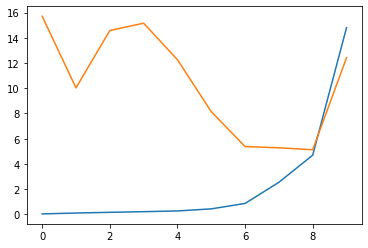

In [32]:
plt.plot(error_train) 
plt.plot(error_val)
plt.show()